# Wine Dataset


## Antes de empezar

Preparamos algunas funciones auxiliares para trabajar:

1. `cargar_datos`: lee el csv con los datos 
1. `predict`: dado un conjunto de datos, devuelve la predicción para cada instancia
1. `accuracy`: métrica sobre el desempeño de una predicción definida como:

  $$accuracy = \frac{\#aciertos}{\#predicciones}$$
        
  Su interpretación puede ser:  en cuántos casos acerté.

In [1]:
import pandas as pd
from typing import Tuple
from sklearn.datasets import load_wine
import sklearn.model_selection

def cargar_datos() -> Tuple[pd.DataFrame, pd.Series]:
    """
    Carga los datos del Wine Dataset desde un archivo CSV y devuelve las características (X) y las etiquetas (y).

    Returns:
        X_train (pd.DataFrame): Características del dataset de entrenamiento, con nombres de columnas.
        y_train (pd.Series): Etiquetas del dataset de entrenamiento
        X_test (pd.DataFrame): Características del dataset de prueba, con nombres de columnas
        y_test (pd.Series): Etiquetas del dataset de prueba
    """
    wine_dataset = load_wine()
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
                    wine_dataset['data'], 
                    wine_dataset['target'], 
                    random_state=4, 
                    test_size=0.1)
    return pd.DataFrame(X_train, columns=wine_dataset['feature_names']), pd.Series(y_train, name='target'), pd.DataFrame(X_test, columns=wine_dataset['feature_names']), pd.Series(y_test, name='target')


def predict(X: pd.DataFrame) -> list:
    """
    Predice la salida para cada fila de los datos. Debe definirse primero la función predict_instance para utilizarla
    """
    y_predicted = []
    for x in X.itertuples():
        try:
            y_i = predict_instance(x)
        except NameError:
            raise NameError("Por favor definir la función predict_instance")
        y_predicted.append(y_i)
    return y_predicted


def accuracy(y_predicted: list, y_real: list) -> float:
    """
    Calcula el accuracy entre un y_predicted y un y_real.
    """
    TP_TN = sum([y_i == y_j for (y_i, y_j) in zip(y_predicted, y_real)])
    P_N = len(y_real)
    return TP_TN / P_N

In [2]:
X_train, y_train, X_test, y_test = cargar_datos()
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0
1,13.84,4.12,2.38,19.5,89.0,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480.0
2,12.00,1.51,2.42,22.0,86.0,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450.0
3,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520.0
4,11.87,4.31,2.39,21.0,82.0,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380.0


A continuación, vamos a mostrar una solución ingenua al problema, que el vino es de clase 0. Luego, vamos a calcular la métrica de desempeño `accuracy` para ver qué tan bien nos fue.

In [3]:
def predict_instance(x: pd.Series) -> int:
    """
    Predice la clase para instancia x.
    """
    prediction = 0

    return prediction

In [4]:
y_pred = predict(X_train)
# Completar el algoritmo para mejorar esta performance. 

print(f"Accuracy: {round(accuracy(y_pred, y_train), 3)}")

Accuracy: 0.325


/var/folders/7g/ls35h7x11hdg1yjtzhxk2z9w0000gn/T/ipykernel_42757/4132467094.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=plt.cm.viridis(label / max(labels)), label=f'Clase {label}')


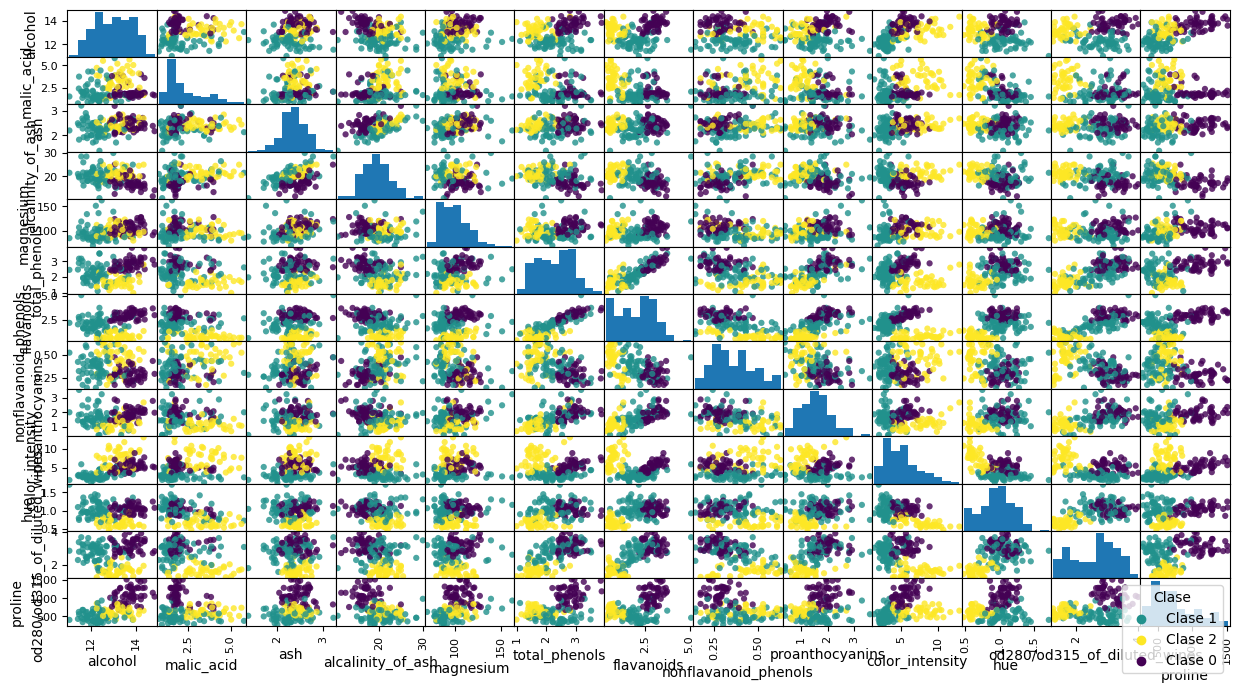

In [5]:
axes = pd.plotting.scatter_matrix(X_train, c=y_train, s=80, figsize=(15, 8), alpha=.8)
import matplotlib.pyplot as plt

# Add legend for classes
labels = y_train.unique()
for label in labels:
    plt.scatter([], [], c=plt.cm.viridis(label / max(labels)), label=f'Clase {label}')
plt.legend(loc='upper right', title='Clase')
plt.show()

## Gráficos útiles

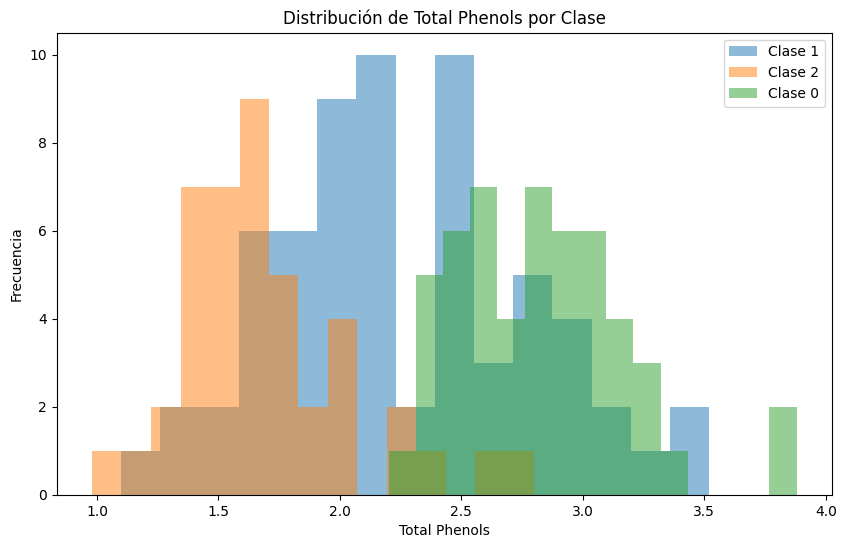

In [6]:
# Histograma de total_phenols solapando las 3 clases
plt.figure(figsize=(10, 6))
for label in y_train.unique():
    subset = X_train[y_train == label]
    plt.hist(subset['total_phenols'], bins=15, alpha=0.5, label=f'Clase {label}')
plt.xlabel('Total Phenols')
plt.ylabel('Frecuencia')
plt.title('Distribución de Total Phenols por Clase')
plt.legend()
plt.show()

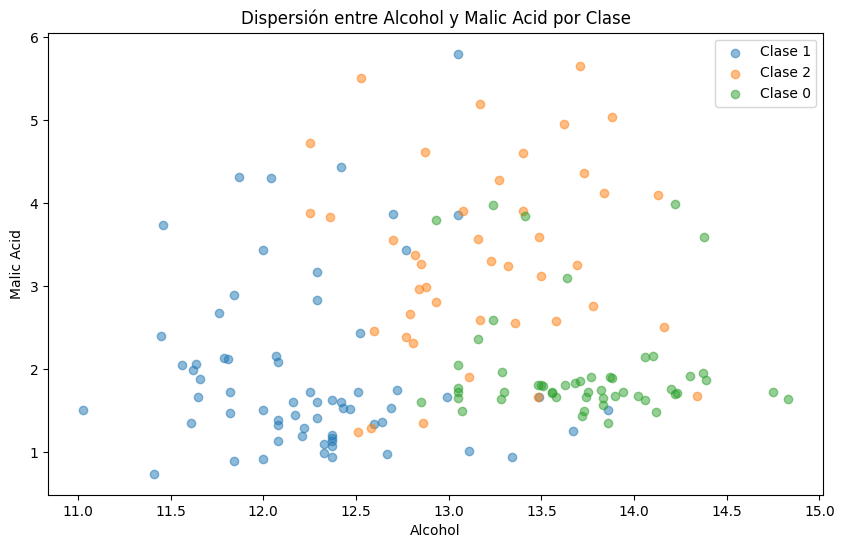

In [ ]:
# Gráfico de dispersión entre dos variables
plt.figure(figsize=(10, 6))
for label in y_train.unique():
    subset = X_train[y_train == label]
    plt.scatter(subset['alcohol'], subset['malic_acid'], alpha=0.5, label=f'Clase {label}')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Dispersión entre Alcohol y Malic Acid por Clase')
plt.legend()
plt.show()